D:\anaconda\envs\datawym\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\envs\datawym\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\envs\datawym\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\envs\datawym\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

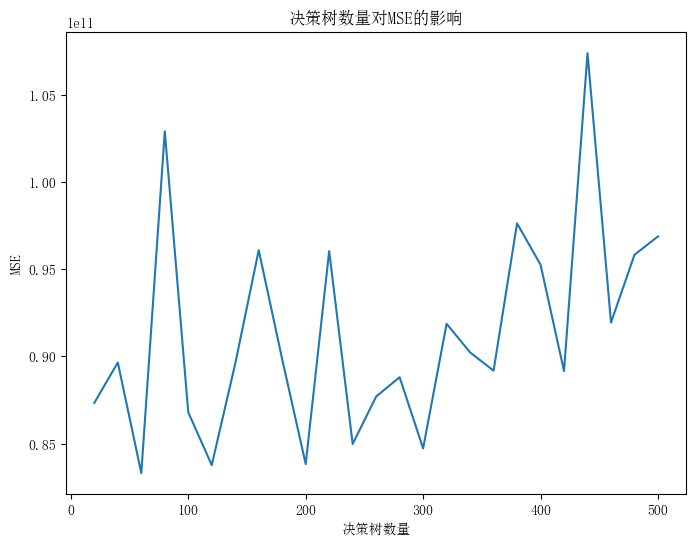

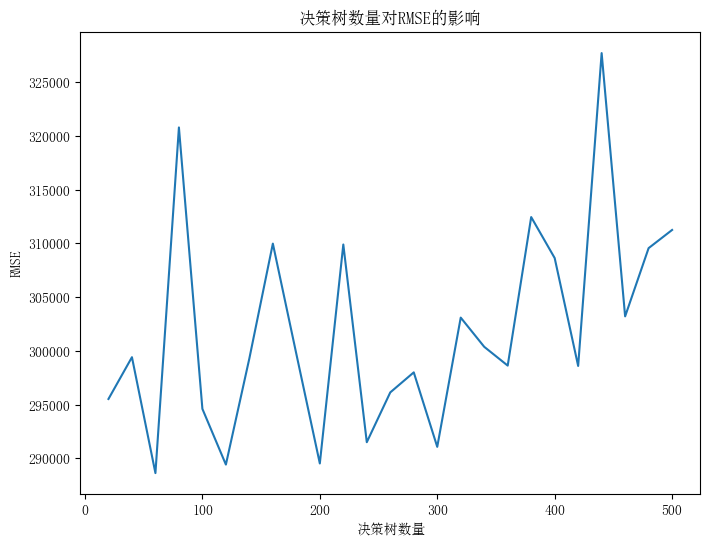

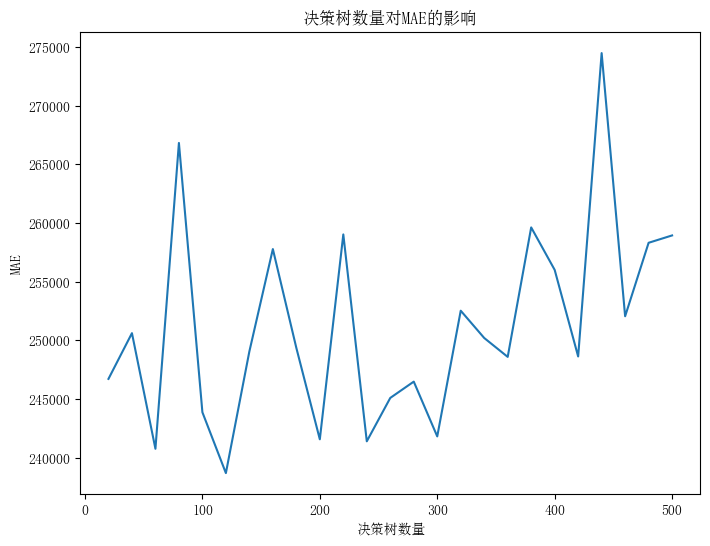

D:\anaconda\envs\datawym\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


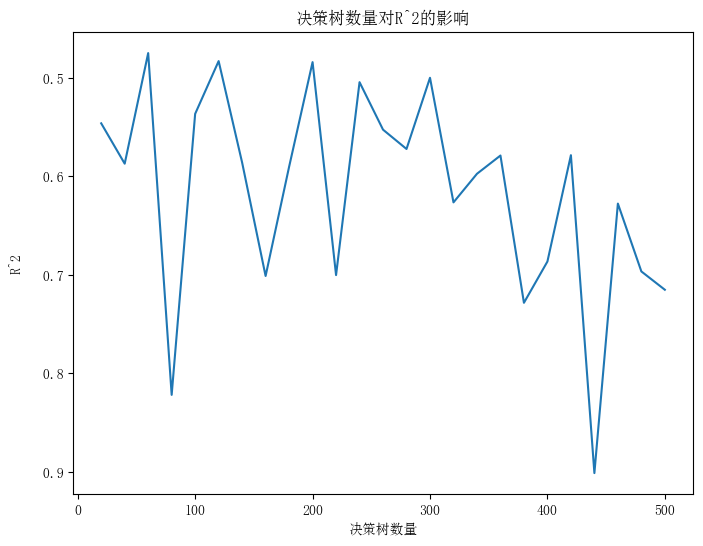

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
plt.rcParams['font.family'] = 'SimSun'
data = pd.read_csv('../newData.csv',encoding='gbk')

# 提取特征和标签
features = data[['月份', '日期', '星期几', '季节', '节假日']]
target = data['航线金额']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# 定义决策树数量的范围
n_estimators_range = range(20, 501, 20)

# 初始化存储评估指标的列表
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# 遍历决策树数量
for n_estimators in n_estimators_range:
    # 初始化随机森林回归模型
    rf_model = RandomForestRegressor()

    # 拟合模型
    rf_model.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = rf_model.predict(X_test)

    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 将评估指标添加到列表中
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# 绘制MSE折线图
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, mse_scores)
plt.xlabel('决策树数量')
plt.ylabel('MSE')
plt.title('决策树数量对MSE的影响')

# 绘制RMSE折线图
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, rmse_scores)
plt.xlabel('决策树数量')
plt.ylabel('RMSE')
plt.title('决策树数量对RMSE的影响')

# 绘制MAE折线图
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, mae_scores)
plt.xlabel('决策树数量')
plt.ylabel('MAE')
plt.title('决策树数量对MAE的影响')

# 绘制R^2折线图
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, r2_scores)
plt.xlabel('决策树数量')
plt.ylabel('R^2')
plt.title('决策树数量对R^2的影响')

# 显示图形
plt.show()